In [16]:
import networkx as nx
import random

In [42]:
from faker import Faker

# Locales that use the Latin alphabet, including India and international Chinese names
latin_locales = ['en_US', 'es_ES', 'fr_FR', 'de_DE', 'it_IT', 'pt_BR', 'nl_NL', 'en_IN']

# Create a Faker instance with these locales
fake = Faker(latin_locales)

# Generate random student names
def generate_student_names(n=10):
    return [fake.name() for _ in range(n)]

# Example usage
students = generate_student_names(100)


In [43]:
seminar_titles = [
    "Introduction to Artificial Intelligence",
    "Cybersecurity and Ethical Hacking",
    "Data Science for Beginners",
    "Building Your First Mobile App",
    "The Future of Renewable Energy",
    "Public Speaking and Leadership Skills",
    "Exploring Space: The Next Frontier",
    "Entrepreneurship and Startups 101",
    "Creative Writing and Storytelling",
    "Psychology of Decision Making"
]

In [44]:
classrooms = [
    "Room 101",
    "Room 202",
    "Room 303",
    "Room 404",
    "Room 505",
    "Lab A",
    "Lab B",
    "Lecture Hall 1",
    "Lecture Hall 2",
    "Seminar Room C"
]

In [45]:
students = students[:10]
seminar_titles = seminar_titles[:10]
classrooms = classrooms[:3]
choices = {x: random.sample(seminar_titles, 3) for x in students}

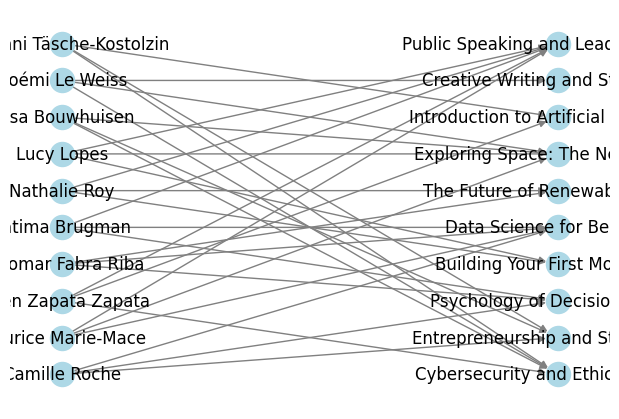

In [47]:

# Create a directed graph
G = nx.DiGraph()

# Add edges from the adjacency list
for node, neighbors in choices.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Assign nodes to bipartite sets (left & right)
left_nodes = set(choices.keys())  # Nodes with outgoing edges
right_nodes = set(n for neighbors in choices.values() for n in neighbors)  # Nodes that are destinations

# Create a position layout for bipartite drawing
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(left_nodes))  # Left side
pos.update((node, (1, i)) for i, node in enumerate(right_nodes))  # Right side

# Draw the graph
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
plt.show()

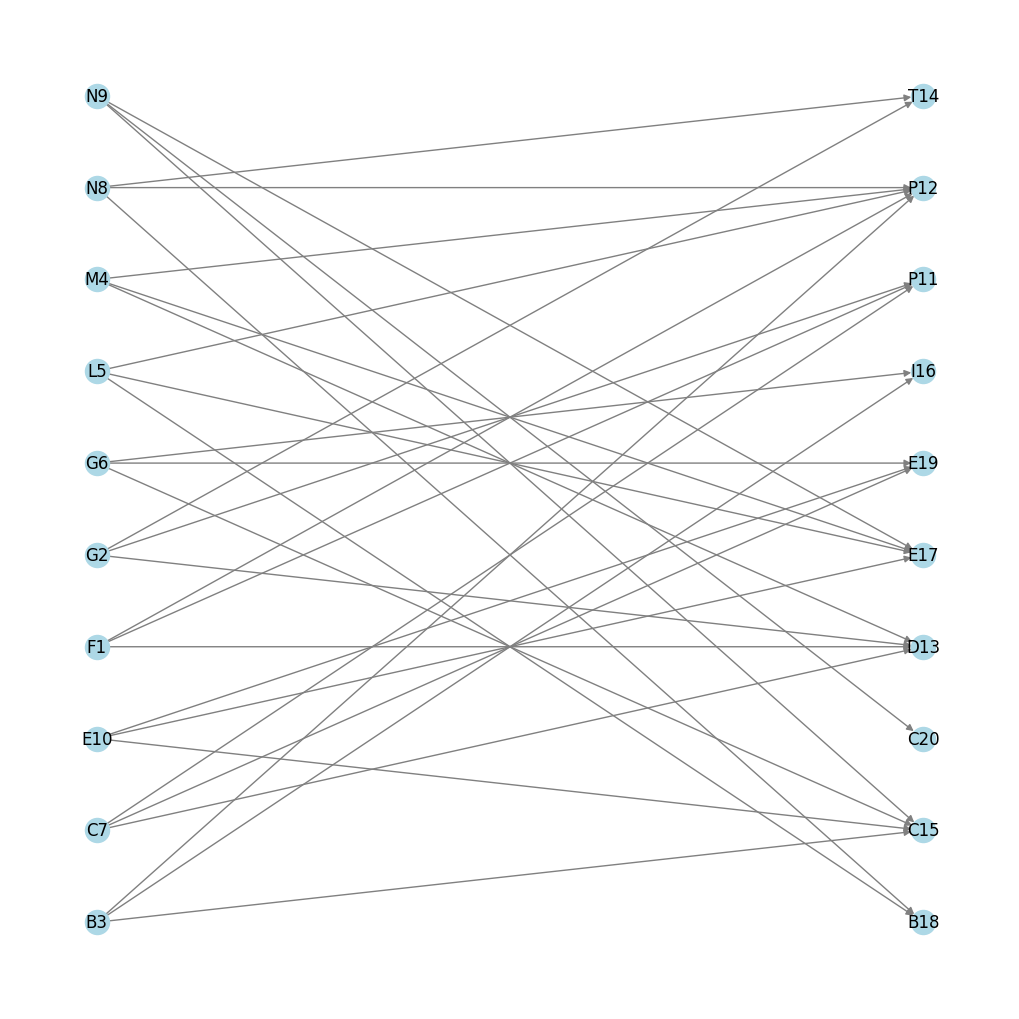

In [49]:
adj_list = choices
import networkx as nx
import matplotlib.pyplot as plt
# Abbreviate node names for readability
abbr = {name: name[0] + str(i+1) for i, name in enumerate(adj_list.keys())}
for neighbors in adj_list.values():
    for i, name in enumerate(neighbors):
        if name not in abbr:
            abbr[name] = name[0] + str(len(abbr)+1)  # Unique ID

# Create directed graph
G = nx.DiGraph()

# Add edges using abbreviated names
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G.add_edge(abbr[node], abbr[neighbor])

# Assign nodes to bipartite sets (left & right)
left_nodes = sorted({abbr[node] for node in adj_list.keys()})  # Nodes with outgoing edges
right_nodes = sorted({abbr[n] for neighbors in adj_list.values() for n in neighbors})  # Destination nodes

# Determine vertical centering
def get_positions(nodes, x_coord):
    """Returns a dictionary with nodes positioned at x_coord and evenly spaced on y-axis."""
    n = len(nodes)
    y_spacing = 5  # Space between nodes
    y_start = -((n - 1) * y_spacing) / 2  # Centering formula
    return {node: (x_coord, y_start + i * y_spacing) for i, node in enumerate(nodes)}

# Compute positions
pos = {}
pos.update(get_positions(left_nodes, 0))  # Left side at x=0
pos.update(get_positions(right_nodes, 1))  # Right side at x=1

# Draw graph with improved readability
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True, font_size=12)

plt.show()
